## **IMPORTS**

In [1]:
import Metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para fazer a NORMALIZAÇÃO
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPClassifier

from sklearn.cluster import KMeans

from imblearn.over_sampling import ADASYN

from imblearn.metrics import geometric_mean_score 

from sklearn.model_selection import ParameterGrid

## **LEITURA DOS DADOS**

In [12]:
#data = pd.read_csv('../Base de Dados/Dados_49_V.csv', na_values='?')

data = pd.read_csv('../Base de Dados/Dados_10_V_FISHER.csv', na_values='?')

print(data.shape)
data.head()

(2185, 11)


,inseminacao_2cat,total_animais_prop,teste_bruc,compra_repr,venda_repr,dest_leilao,vacina_semqqidade,piquete_parto,assist_vet,tipo_assist,resul_prop
0,0,15,0,0,0,0,0,0,0,-1,0
1,0,142,0,1,1,0,1,1,0,-1,0
2,0,40,0,1,1,0,-1,1,0,-1,0
3,0,68,0,1,0,0,1,0,0,-1,0
4,0,38,0,0,0,0,0,0,0,-1,0


In [13]:
# Gerando um DataFrame das variáveis preditoras originais SEM a variável TARGET
VAR_PREDITORAS_ORIG = data.drop('resul_prop', axis = 1)

# Gerando um DataFrame somente da variavel TARGET
VAR_TARGET = data['resul_prop']

## **NORMALIZAÇÃO**

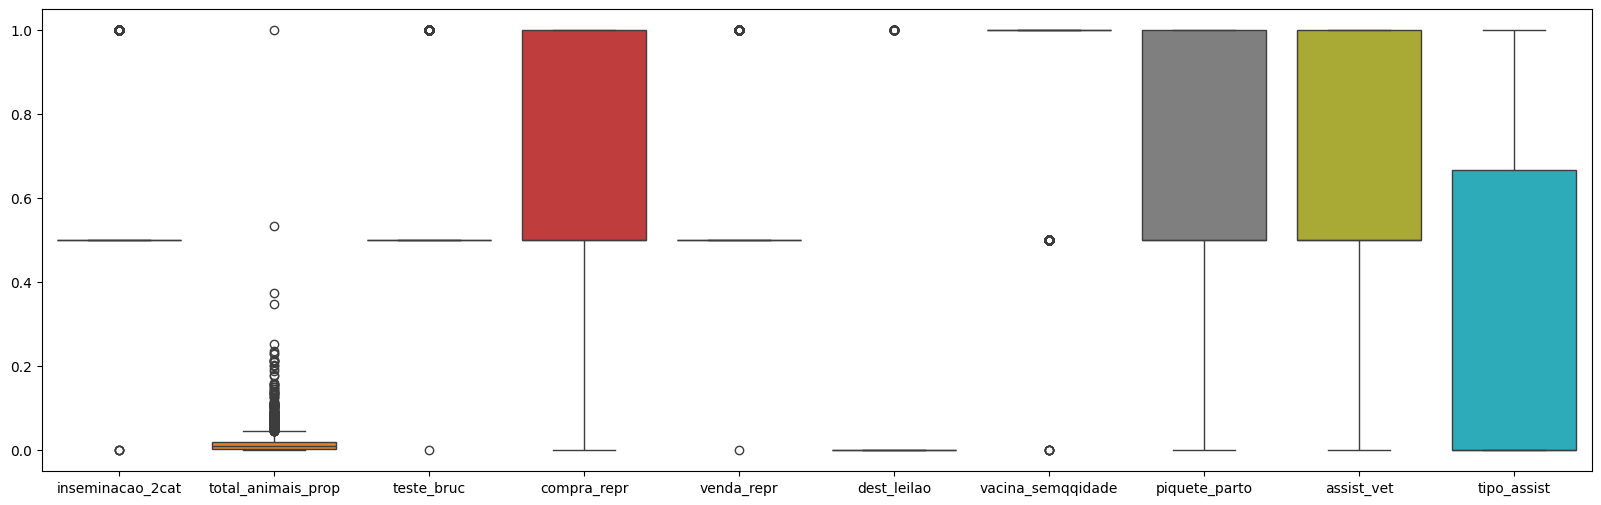

In [14]:
# Criando um objeto para NORMALIZAR os dados
obj_normalizacao = MinMaxScaler().fit(VAR_PREDITORAS_ORIG)

# Aplicando a NORMALIZAÇÃO
VAR_PREDITORAS_NORM = obj_normalizacao.transform(VAR_PREDITORAS_ORIG)

# Transformando para DataFrame e nomeando as colunas
VAR_PREDITORAS_NORM = pd.DataFrame(VAR_PREDITORAS_NORM)

VAR_PREDITORAS_NORM.columns = data.drop('resul_prop', axis = 1).columns

VAR_PREDITORAS_NORM

plt.figure(figsize=(20,6))
ax = sns.boxplot(data=VAR_PREDITORAS_NORM)

#VAR_PREDITORAS_NORM.nunique()
#VAR_PREDITORAS_NORM.describe()
#corr = VAR_PREDITORAS_NORM.corr()
#VAR_PREDITORAS_NORM.shape

#plt.figure(figsize=(20,20))
#sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
#plt.show()

#DATA_NORM = VAR_PREDITORAS_NORM.assign(resul_prop=VAR_TARGET)
#sns.FacetGrid(DATA_NORM, hue="resul_prop", height=6).map(sns.kdeplot, "teste_bruc").add_legend()
#plt.show()

#sns.stripplot(x="resul_prop", y="total_animais_prop", data=DATA_NORM, jitter=True, edgecolor="gray")
#plt.show()

#sns.pairplot(data, hue="resul_prop", vars = ["total_animais_prop", "piquete_parto", "teste_bruc", "tipo_assist", "vacina_semqqidade", "assist_vet"])
#plt.show()

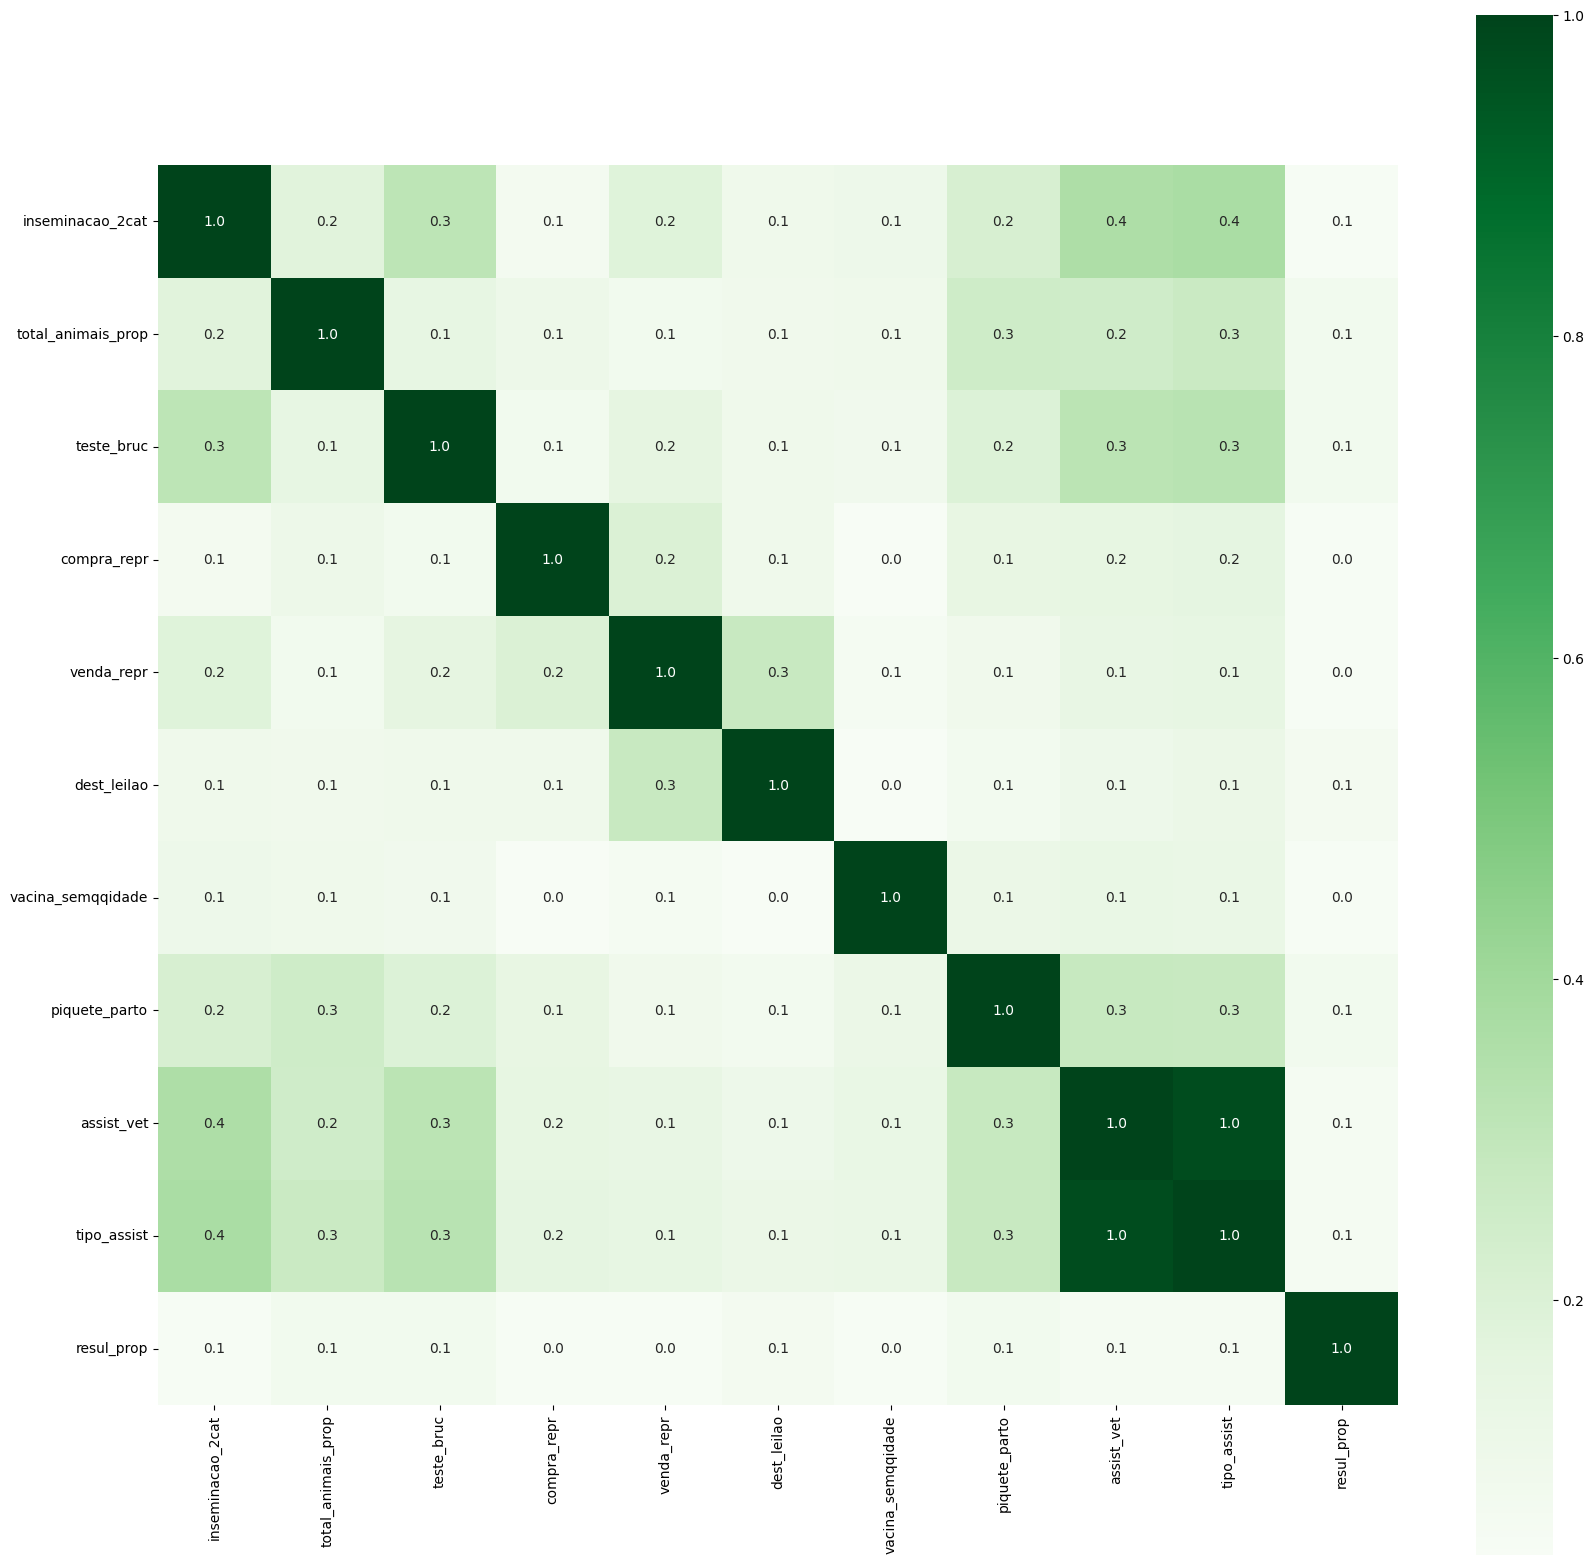

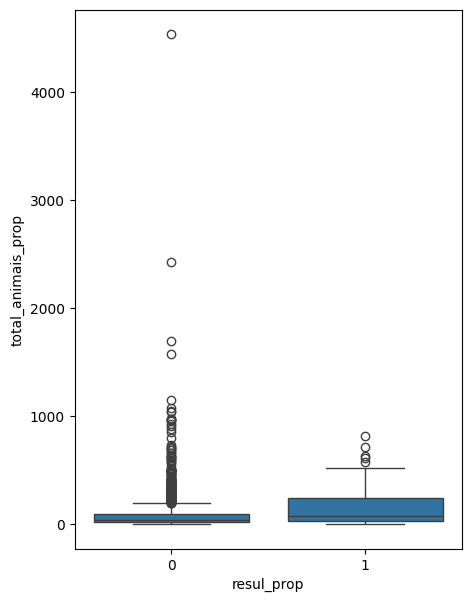

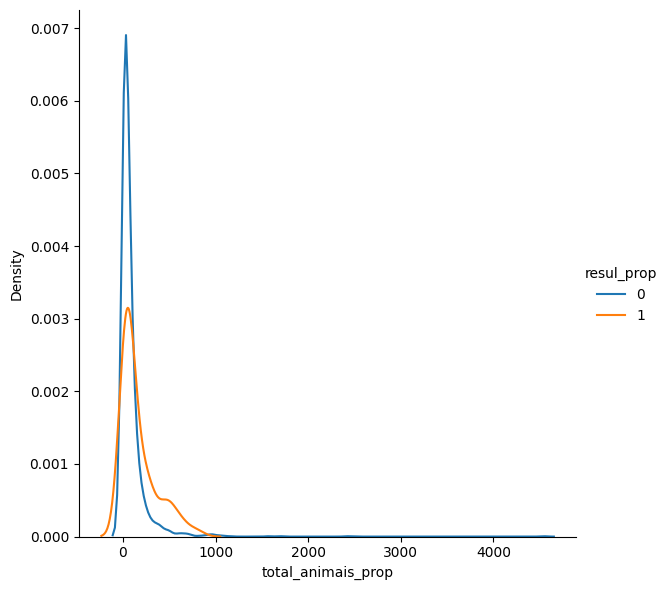

C:\Users\caiod\AppData\Local\Temp\ipykernel_18188\1478661703.py:15: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x="resul_prop", y="total_animais_prop", data=data, jitter=True, edgecolor="gray")


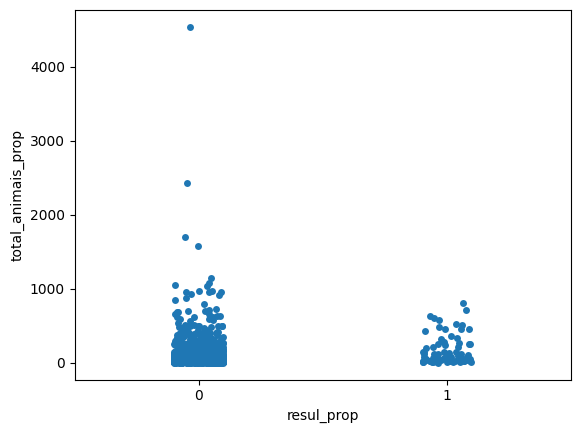

In [29]:
#DATA_NORM = VAR_PREDITORAS_NORM.assign(resul_prop=VAR_TARGET)

corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')
plt.show()

plt.figure(figsize=(5,7))
sns.boxplot(x="resul_prop", y="total_animais_prop", data=data)
plt.show()

sns.FacetGrid(data, hue="resul_prop", height=6).map(sns.kdeplot, "total_animais_prop").add_legend()
plt.show()

sns.stripplot(x="resul_prop", y="total_animais_prop", data=data, jitter=True, edgecolor="gray")
plt.show()

#sns.pairplot(data, hue="resul_prop", vars = ["total_animais_prop", "piquete_parto", "teste_bruc", "tipo_assist", "vacina_semqqidade", "assist_vet"])
#plt.show()

## **AGRUPAMENTO**

In [25]:
DATA_NORM = VAR_PREDITORAS_NORM.assign(resul_prop=VAR_TARGET)
DATA_NORM_NEG = VAR_PREDITORAS_NORM.assign(resul_prop=VAR_TARGET).query('resul_prop == 0').reset_index(drop=True)
DATA_NORM_POS = VAR_PREDITORAS_NORM.assign(resul_prop=VAR_TARGET).query('resul_prop == 1').reset_index(drop=True)

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(DATA_NORM_NEG.drop('resul_prop', axis = 1))
#print(kmeans.labels_)

#print(pd.DataFrame(kmeans.labels_))
DATA_NORM_NEG = DATA_NORM_NEG.assign(group=pd.DataFrame(kmeans.labels_))

DATA_NORM_NEG_GROUP0 = DATA_NORM_NEG.query('group == 0')
#print(DATA_NORM_NEG_GROUP0.shape)

DATA_NORM_NEG_GROUP1 = DATA_NORM_NEG.query('group == 1')
#print(DATA_NORM_NEG_GROUP1.shape)

DATA_NORM_NEG_GROUP2 = DATA_NORM_NEG.query('group == 2')
#print(DATA_NORM_NEG_GROUP2.shape)

DATA_NORM_NEG_GROUP3 = DATA_NORM_NEG.query('group == 3')
#print(DATA_NORM_NEG_GROUP3.shape)

DATA_NORM_NEG_GROUP0 = DATA_NORM_NEG_GROUP0.sample(frac=1).drop('group', axis = 1).reset_index(drop=True)
DATA_NORM_NEG_GROUP1 = DATA_NORM_NEG_GROUP1.sample(frac=1).drop('group', axis = 1).reset_index(drop=True)
DATA_NORM_NEG_GROUP2 = DATA_NORM_NEG_GROUP2.sample(frac=1).drop('group', axis = 1).reset_index(drop=True)
DATA_NORM_NEG_GROUP3 = DATA_NORM_NEG_GROUP3.sample(frac=1).drop('group', axis = 1).reset_index(drop=True)

## **RNA + Replicação**

In [26]:
metricas = pd.DataFrame()

num_am_grupo_neg = 30
num_am_grupo_pos = 60

for i in range (0,100):
    DATA_NORM_NEG_GROUP0 = DATA_NORM_NEG_GROUP0.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP1 = DATA_NORM_NEG_GROUP1.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP2 = DATA_NORM_NEG_GROUP2.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP3 = DATA_NORM_NEG_GROUP3.sample(frac=1).reset_index(drop=True)
    
    #-------------------------- MONTANDO CONJUNTO DE TREINO -------------------------------
    CLASSE_NEG = pd.concat([DATA_NORM_NEG_GROUP0.head(num_am_grupo_neg), 
        DATA_NORM_NEG_GROUP1.head(num_am_grupo_neg),
        DATA_NORM_NEG_GROUP2.head(num_am_grupo_neg),
        DATA_NORM_NEG_GROUP3.head(num_am_grupo_neg)], ignore_index = True)

    DATA_NORM_POS = DATA_NORM_POS.sample(frac=1).reset_index(drop=True)
    CLASSE_POS = pd.concat([DATA_NORM_POS.head(num_am_grupo_pos),DATA_NORM_POS.head(num_am_grupo_pos)], ignore_index = True)

    CONJ_TRAIN = pd.concat([CLASSE_NEG,CLASSE_POS]).sample(frac=1).reset_index(drop=True)

    X_TRAIN = CONJ_TRAIN.drop('resul_prop', axis = 1)
    Y_TRAIN = CONJ_TRAIN['resul_prop']


    #-------------------------- TREINANDO RNA -------------------------------
    rna = MLPClassifier(hidden_layer_sizes=(10),
                        activation='tanh',
                        solver='sgd',
                        max_iter=10000).fit(X_TRAIN.values, Y_TRAIN.values)

    #-------------------------- TESTE RNA -------------------------------
    TEST_NEG = pd.concat([DATA_NORM_NEG_GROUP0.tail(len(DATA_NORM_NEG_GROUP0)-num_am_grupo_neg), 
        DATA_NORM_NEG_GROUP1.tail(len(DATA_NORM_NEG_GROUP1)-num_am_grupo_neg),
        DATA_NORM_NEG_GROUP2.tail(len(DATA_NORM_NEG_GROUP2)-num_am_grupo_neg),
        DATA_NORM_NEG_GROUP3.tail(len(DATA_NORM_NEG_GROUP3)-num_am_grupo_neg)], ignore_index = True)

    TEST_POS = DATA_NORM_POS.tail(len(DATA_NORM_POS)-num_am_grupo_pos)

    X_TEST = pd.concat([TEST_NEG,TEST_POS], ignore_index = True).drop('resul_prop', axis = 1)
    Y_TEST = pd.concat([TEST_NEG,TEST_POS], ignore_index = True)['resul_prop']

    valores_preditos = rna.predict(X_TEST.values)

    #-------------------------- MÉTRICAS DE DESEMPENHO -------------------------------
    #class_names = ['Negativo', 'Positivo']
    metricas = pd.concat([metricas, Metrics.cacule_metrics(Y_TEST,valores_preditos)], axis=0, ignore_index=True)

Metrics.save_metrics(metricas, "RNA_"+str(data.shape[1]-1)+"V_rep.csv")

print("FIM")

FIM


## **RNA + ADASYN**

In [27]:
metricas = pd.DataFrame()

num_am_grupo_neg = 60
num_am_grupo_pos = 60

for i in range (0,100):
    DATA_NORM_NEG_GROUP0 = DATA_NORM_NEG_GROUP0.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP1 = DATA_NORM_NEG_GROUP1.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP2 = DATA_NORM_NEG_GROUP2.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP3 = DATA_NORM_NEG_GROUP3.sample(frac=1).reset_index(drop=True)


    #-------------------------- ADASYN -------------------------------
    DATA_NORM_POS = DATA_NORM_POS.sample(frac=1).reset_index(drop=True)
    CLASSE_POS_ADASYN = DATA_NORM_POS.head(num_am_grupo_pos)

    CLASSE_NEG_ADASYN = DATA_NORM_NEG.drop('group', axis = 1)

    X_ADASYN_ORIGINAL = pd.concat([CLASSE_NEG_ADASYN.drop('resul_prop', axis = 1),
        CLASSE_POS_ADASYN.drop('resul_prop', axis = 1)]).reset_index(drop=True)

    Y_ADASYN_ORIGINAL = pd.concat([CLASSE_NEG_ADASYN['resul_prop'],
        CLASSE_POS_ADASYN['resul_prop']]).reset_index(drop=True)

    ada = ADASYN(sampling_strategy=0.12, n_neighbors=7)

    X_RESAMPLING, Y_RESAMPLING = ada.fit_resample(X_ADASYN_ORIGINAL, Y_ADASYN_ORIGINAL)


    #-------------------------- MONTANDO CONJUNTO DE TREINO -------------------------------
    CLASSE_NEG = pd.concat([DATA_NORM_NEG_GROUP0.head(num_am_grupo_neg),
        DATA_NORM_NEG_GROUP1.head(num_am_grupo_neg),
        DATA_NORM_NEG_GROUP2.head(num_am_grupo_neg),
        DATA_NORM_NEG_GROUP3.head(num_am_grupo_neg)], ignore_index = True)

    CLASSE_POS = X_RESAMPLING.assign(resul_prop=Y_RESAMPLING).query('resul_prop == 1').reset_index(drop=True)

    CONJ_TRAIN = pd.concat([CLASSE_NEG,CLASSE_POS]).sample(frac=1).reset_index(drop=True)

    X_TRAIN = CONJ_TRAIN.drop('resul_prop', axis = 1)
    Y_TRAIN = CONJ_TRAIN['resul_prop']

    #-------------------------- TREINANDO RNA -------------------------------
    rna = MLPClassifier(hidden_layer_sizes=(15),
                        activation='tanh',
                        solver='sgd',
                        max_iter=10000).fit(X_TRAIN.values, Y_TRAIN.values)

    #-------------------------- TESTE RNA -------------------------------
    TEST_NEG = pd.concat([DATA_NORM_NEG_GROUP0.tail(len(DATA_NORM_NEG_GROUP0)-num_am_grupo_neg), 
        DATA_NORM_NEG_GROUP1.tail(len(DATA_NORM_NEG_GROUP1)-num_am_grupo_neg),
        DATA_NORM_NEG_GROUP2.tail(len(DATA_NORM_NEG_GROUP2)-num_am_grupo_neg),
        DATA_NORM_NEG_GROUP3.tail(len(DATA_NORM_NEG_GROUP3)-num_am_grupo_neg)], ignore_index = True)

    TEST_POS = DATA_NORM_POS.tail(len(DATA_NORM_POS)-num_am_grupo_pos)

    X_TEST = pd.concat([TEST_NEG,TEST_POS], ignore_index = True).drop('resul_prop', axis = 1)
    Y_TEST = pd.concat([TEST_NEG,TEST_POS], ignore_index = True)['resul_prop']

    valores_preditos = rna.predict(X_TEST.values)

    #-------------------------- MÉTRICAS DE DESEMPENHO -------------------------------
    #class_names = ['Negativo', 'Positivo']
    metricas = pd.concat([metricas, Metrics.cacule_metrics(Y_TEST,valores_preditos)], axis=0, ignore_index=True)

Metrics.save_metrics(metricas, "RNA_"+str(data.shape[1]-1)+"V_adasyn.csv")

print("FIM")

FIM


## **RNA CONTROLE**

In [28]:
metricas = pd.DataFrame()

num_am_grupo_neg = 15
num_am_grupo_pos = 60

for i in range (0,100):
    DATA_NORM_NEG_GROUP0 = DATA_NORM_NEG_GROUP0.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP1 = DATA_NORM_NEG_GROUP1.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP2 = DATA_NORM_NEG_GROUP2.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP3 = DATA_NORM_NEG_GROUP3.sample(frac=1).reset_index(drop=True)

    #-------------------------- MONTANDO CONJUNTO DE TREINO -------------------------------
    CLASSE_NEG = pd.concat([DATA_NORM_NEG_GROUP0.head(num_am_grupo_neg), 
        DATA_NORM_NEG_GROUP1.head(num_am_grupo_neg),
        DATA_NORM_NEG_GROUP2.head(num_am_grupo_neg),
        DATA_NORM_NEG_GROUP3.head(num_am_grupo_neg)], ignore_index = True)

    DATA_NORM_POS = DATA_NORM_POS.sample(frac=1).reset_index(drop=True)
    CLASSE_POS = DATA_NORM_POS.head(num_am_grupo_pos)

    CONJ_TRAIN = pd.concat([CLASSE_NEG,CLASSE_POS]).sample(frac=1).reset_index(drop=True)

    X_TRAIN = CONJ_TRAIN.drop('resul_prop', axis = 1)
    Y_TRAIN = CONJ_TRAIN['resul_prop']

    #-------------------------- TREINANDO RNA -------------------------------
    rna = MLPClassifier(hidden_layer_sizes=(30),
                        activation='tanh',
                        solver='sgd',
                        max_iter=10000).fit(X_TRAIN.values, Y_TRAIN.values)

    #-------------------------- TESTE RNA -------------------------------
    TEST_NEG = pd.concat([DATA_NORM_NEG_GROUP0.tail(len(DATA_NORM_NEG_GROUP0)-num_am_grupo_neg), 
        DATA_NORM_NEG_GROUP1.tail(len(DATA_NORM_NEG_GROUP1)-num_am_grupo_neg),
        DATA_NORM_NEG_GROUP2.tail(len(DATA_NORM_NEG_GROUP2)-num_am_grupo_neg),
        DATA_NORM_NEG_GROUP3.tail(len(DATA_NORM_NEG_GROUP3)-num_am_grupo_neg)], ignore_index = True)

    TEST_POS = DATA_NORM_POS.tail(len(DATA_NORM_POS)-num_am_grupo_pos)

    X_TEST = pd.concat([TEST_NEG,TEST_POS], ignore_index = True).drop('resul_prop', axis = 1)
    Y_TEST = pd.concat([TEST_NEG,TEST_POS], ignore_index = True)['resul_prop']

    valores_preditos = rna.predict(X_TEST.values)

    #-------------------------- MÉTRICAS DE DESEMPENHO -------------------------------
    #class_names = ['Negativo', 'Positivo']
    metricas = pd.concat([metricas, Metrics.cacule_metrics(Y_TEST,valores_preditos)], axis=0, ignore_index=True)

Metrics.save_metrics(metricas, "RNA_"+str(data.shape[1]-1)+"V_contr.csv")

print("FIM")

FIM


## **TUNING RNA + Replicação**

In [13]:
metricas = pd.DataFrame()

num_am_grupo_neg = 30
num_am_grupo_pos = 60

for i in range (0,50):
    DATA_NORM_NEG_GROUP0 = DATA_NORM_NEG_GROUP0.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP1 = DATA_NORM_NEG_GROUP1.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP2 = DATA_NORM_NEG_GROUP2.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP3 = DATA_NORM_NEG_GROUP3.sample(frac=1).reset_index(drop=True)
    
    #-------------------------- MONTANDO CONJUNTO DE TREINO -------------------------------
    CLASSE_NEG = pd.concat([DATA_NORM_NEG_GROUP0.head(num_am_grupo_neg), 
        DATA_NORM_NEG_GROUP1.head(num_am_grupo_neg),
        DATA_NORM_NEG_GROUP2.head(num_am_grupo_neg),
        DATA_NORM_NEG_GROUP3.head(num_am_grupo_neg)], ignore_index = True)

    DATA_NORM_POS = DATA_NORM_POS.sample(frac=1).reset_index(drop=True)
    CLASSE_POS = pd.concat([DATA_NORM_POS.head(num_am_grupo_pos),DATA_NORM_POS.head(num_am_grupo_pos)], ignore_index = True)

    CONJ_TRAIN = pd.concat([CLASSE_NEG,CLASSE_POS]).sample(frac=1).reset_index(drop=True)

    X_TRAIN = CONJ_TRAIN.drop('resul_prop', axis = 1)
    Y_TRAIN = CONJ_TRAIN['resul_prop']

    #-------------------------- CRIANDO PARÂMETROS PARA TUNING -------------------------------
    grid = {'hidden_layer_sizes': [5, 10, 15, 20, 30], 
            'activation': ['logistic', 'tanh', 'relu']}
    
    parameters = list(ParameterGrid(grid))

    for param in parameters:
        #-------------------------- TREINANDO KNN -------------------------------
        rna = MLPClassifier(hidden_layer_sizes=(param['hidden_layer_sizes']),
                            activation=param['activation'],
                            solver='sgd',
                            max_iter=10000)
        
        rna.fit(X_TRAIN.values, Y_TRAIN.values)

        #-------------------------- TESTE RNA -------------------------------
        TEST_NEG = pd.concat([DATA_NORM_NEG_GROUP0.tail(len(DATA_NORM_NEG_GROUP0)-num_am_grupo_neg), 
            DATA_NORM_NEG_GROUP1.tail(len(DATA_NORM_NEG_GROUP1)-num_am_grupo_neg),
            DATA_NORM_NEG_GROUP2.tail(len(DATA_NORM_NEG_GROUP2)-num_am_grupo_neg),
            DATA_NORM_NEG_GROUP3.tail(len(DATA_NORM_NEG_GROUP3)-num_am_grupo_neg)], ignore_index = True)

        TEST_POS = DATA_NORM_POS.tail(len(DATA_NORM_POS)-num_am_grupo_pos)

        X_TEST = pd.concat([TEST_NEG,TEST_POS], ignore_index = True).drop('resul_prop', axis = 1)
        Y_TEST = pd.concat([TEST_NEG,TEST_POS], ignore_index = True)['resul_prop']

        valores_preditos = rna.predict(X_TEST.values)

        result = np.concatenate((str(param), Metrics.cacule_metrics(Y_TEST,valores_preditos)), axis=None)

        metricas = pd.concat([metricas,pd.DataFrame(data=result).T], axis=0, ignore_index=True)

Metrics.save_tuning(metricas, "RNA_"+str(data.shape[1]-1)+"V_rep.csv")

print("FIM")

c:\Users\caiod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caiod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caiod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caiod\AppData\Local

FIM


## **TUNING RNA + ADASYN**

In [14]:
metricas = pd.DataFrame()

num_am_grupo_neg = 60
num_am_grupo_pos = 60

for i in range (0,50):
    DATA_NORM_NEG_GROUP0 = DATA_NORM_NEG_GROUP0.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP1 = DATA_NORM_NEG_GROUP1.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP2 = DATA_NORM_NEG_GROUP2.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP3 = DATA_NORM_NEG_GROUP3.sample(frac=1).reset_index(drop=True)

    #-------------------------- ADASYN -------------------------------
    DATA_NORM_POS = DATA_NORM_POS.sample(frac=1).reset_index(drop=True)
    CLASSE_POS_ADASYN = DATA_NORM_POS.head(num_am_grupo_pos)

    CLASSE_NEG_ADASYN = DATA_NORM_NEG.drop('group', axis = 1)

    X_ADASYN_ORIGINAL = pd.concat([CLASSE_NEG_ADASYN.drop('resul_prop', axis = 1),
        CLASSE_POS_ADASYN.drop('resul_prop', axis = 1)]).reset_index(drop=True)

    Y_ADASYN_ORIGINAL = pd.concat([CLASSE_NEG_ADASYN['resul_prop'],
        CLASSE_POS_ADASYN['resul_prop']]).reset_index(drop=True)

    ada = ADASYN(sampling_strategy=0.12, n_neighbors=7)

    X_RESAMPLING, Y_RESAMPLING = ada.fit_resample(X_ADASYN_ORIGINAL, Y_ADASYN_ORIGINAL)


    #-------------------------- MONTANDO CONJUNTO DE TREINO -------------------------------
    CLASSE_NEG = pd.concat([DATA_NORM_NEG_GROUP0.head(num_am_grupo_neg),
        DATA_NORM_NEG_GROUP1.head(num_am_grupo_neg),
        DATA_NORM_NEG_GROUP2.head(num_am_grupo_neg),
        DATA_NORM_NEG_GROUP3.head(num_am_grupo_neg)], ignore_index = True)

    CLASSE_POS = X_RESAMPLING.assign(resul_prop=Y_RESAMPLING).query('resul_prop == 1').reset_index(drop=True)

    CONJ_TRAIN = pd.concat([CLASSE_NEG,CLASSE_POS]).sample(frac=1).reset_index(drop=True)

    X_TRAIN = CONJ_TRAIN.drop('resul_prop', axis = 1)
    Y_TRAIN = CONJ_TRAIN['resul_prop']

    #-------------------------- CRIANDO PARÂMETROS PARA TUNING -------------------------------
    grid = {'hidden_layer_sizes': [5, 10, 15, 20, 30], 
            'activation': ['logistic', 'tanh', 'relu']}
    
    parameters = list(ParameterGrid(grid))

    for param in parameters:
        #-------------------------- TREINANDO KNN -------------------------------
        rna = MLPClassifier(hidden_layer_sizes=(param['hidden_layer_sizes']),
                            activation=param['activation'],
                            solver='sgd',
                            max_iter=10000)
        
        rna.fit(X_TRAIN.values, Y_TRAIN.values)

        #-------------------------- TESTE RNA -------------------------------
        TEST_NEG = pd.concat([DATA_NORM_NEG_GROUP0.tail(len(DATA_NORM_NEG_GROUP0)-num_am_grupo_neg), 
            DATA_NORM_NEG_GROUP1.tail(len(DATA_NORM_NEG_GROUP1)-num_am_grupo_neg),
            DATA_NORM_NEG_GROUP2.tail(len(DATA_NORM_NEG_GROUP2)-num_am_grupo_neg),
            DATA_NORM_NEG_GROUP3.tail(len(DATA_NORM_NEG_GROUP3)-num_am_grupo_neg)], ignore_index = True)

        TEST_POS = DATA_NORM_POS.tail(len(DATA_NORM_POS)-num_am_grupo_pos)

        X_TEST = pd.concat([TEST_NEG,TEST_POS], ignore_index = True).drop('resul_prop', axis = 1)
        Y_TEST = pd.concat([TEST_NEG,TEST_POS], ignore_index = True)['resul_prop']

        valores_preditos = rna.predict(X_TEST.values)

        result = np.concatenate((str(param), Metrics.cacule_metrics(Y_TEST,valores_preditos)), axis=None)

        metricas = pd.concat([metricas,pd.DataFrame(data=result).T], axis=0, ignore_index=True)

Metrics.save_tuning(metricas, "RNA_"+str(data.shape[1]-1)+"V_adasyn.csv")

print("FIM")

c:\Users\caiod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caiod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caiod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caiod\AppData\Local

FIM


## **TUNING RNA CONTROLE**

In [15]:
metricas = pd.DataFrame()

num_am_grupo_neg = 15
num_am_grupo_pos = 60

for i in range (0,50):
    DATA_NORM_NEG_GROUP0 = DATA_NORM_NEG_GROUP0.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP1 = DATA_NORM_NEG_GROUP1.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP2 = DATA_NORM_NEG_GROUP2.sample(frac=1).reset_index(drop=True)
    DATA_NORM_NEG_GROUP3 = DATA_NORM_NEG_GROUP3.sample(frac=1).reset_index(drop=True)

    #-------------------------- MONTANDO CONJUNTO DE TREINO -------------------------------
    CLASSE_NEG = pd.concat([DATA_NORM_NEG_GROUP0.head(num_am_grupo_neg), 
        DATA_NORM_NEG_GROUP1.head(num_am_grupo_neg),
        DATA_NORM_NEG_GROUP2.head(num_am_grupo_neg),
        DATA_NORM_NEG_GROUP3.head(num_am_grupo_neg)], ignore_index = True)

    DATA_NORM_POS = DATA_NORM_POS.sample(frac=1).reset_index(drop=True)
    CLASSE_POS = DATA_NORM_POS.head(num_am_grupo_pos)

    CONJ_TRAIN = pd.concat([CLASSE_NEG,CLASSE_POS]).sample(frac=1).reset_index(drop=True)

    X_TRAIN = CONJ_TRAIN.drop('resul_prop', axis = 1)
    Y_TRAIN = CONJ_TRAIN['resul_prop']

    #-------------------------- CRIANDO PARÂMETROS PARA TUNING -------------------------------
    grid = {'hidden_layer_sizes': [5, 10, 15, 20, 30], 
            'activation': ['logistic', 'tanh', 'relu']}
    
    parameters = list(ParameterGrid(grid))

    for param in parameters:
        #-------------------------- TREINANDO KNN -------------------------------
        rna = MLPClassifier(hidden_layer_sizes=(param['hidden_layer_sizes']),
                            activation=param['activation'],
                            solver='sgd',
                            max_iter=10000)
        
        rna.fit(X_TRAIN.values, Y_TRAIN.values)

        #-------------------------- TESTE RNA -------------------------------
        TEST_NEG = pd.concat([DATA_NORM_NEG_GROUP0.tail(len(DATA_NORM_NEG_GROUP0)-num_am_grupo_neg), 
            DATA_NORM_NEG_GROUP1.tail(len(DATA_NORM_NEG_GROUP1)-num_am_grupo_neg),
            DATA_NORM_NEG_GROUP2.tail(len(DATA_NORM_NEG_GROUP2)-num_am_grupo_neg),
            DATA_NORM_NEG_GROUP3.tail(len(DATA_NORM_NEG_GROUP3)-num_am_grupo_neg)], ignore_index = True)

        TEST_POS = DATA_NORM_POS.tail(len(DATA_NORM_POS)-num_am_grupo_pos)

        X_TEST = pd.concat([TEST_NEG,TEST_POS], ignore_index = True).drop('resul_prop', axis = 1)
        Y_TEST = pd.concat([TEST_NEG,TEST_POS], ignore_index = True)['resul_prop']

        valores_preditos = rna.predict(X_TEST.values)

        gmean = geometric_mean_score(Y_TEST, valores_preditos)

        result = np.concatenate((str(param), Metrics.cacule_metrics(Y_TEST,valores_preditos)), axis=None)

        metricas = pd.concat([metricas,pd.DataFrame(data=result).T], axis=0, ignore_index=True)

Metrics.save_tuning(metricas, "RNA_"+str(data.shape[1]-1)+"V_contr.csv")

print("FIM")

c:\Users\caiod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caiod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caiod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caiod\AppData\Local

FIM
